# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

1. Reading and Understanding the data
2. Training the model
3. Residual Analysis
4. Predicting and evaluating the model on test set 

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the data
advertising=pd.read_csv("advertising.csv")
print(advertising)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
#takes all numeric column and give summary statistics
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

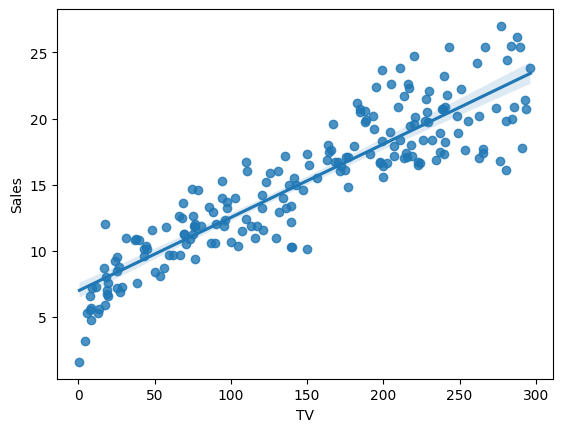

In [8]:
#visualise the data

sns.regplot(x='TV',y='Sales',data=advertising)

TV advertising and sales seems coorelated

<Axes: xlabel='Radio', ylabel='Sales'>

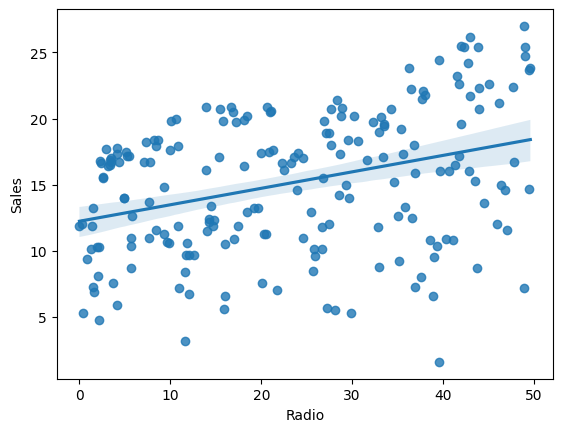

In [9]:
sns.regplot(x='Radio',y='Sales',data=advertising)

The coorelation between radio and sales doesn't seems smooth

<Axes: xlabel='Newspaper', ylabel='Sales'>

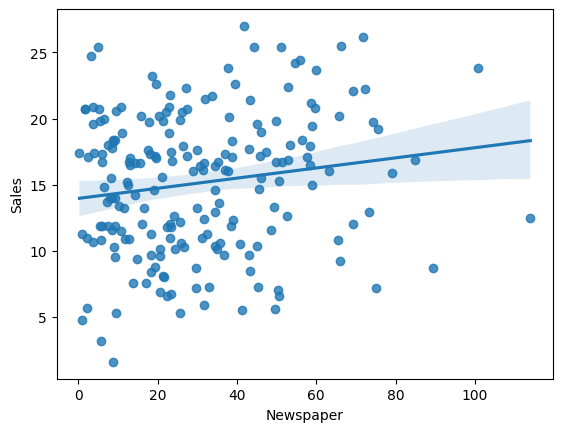

In [10]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)

The data is again found to be scattered

We will use pairplot to plot them together

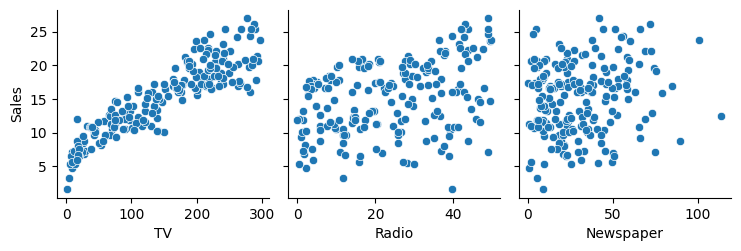

In [11]:
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

Heatmap helps to plot corelation between different variables

In [12]:
#represents coorelation between different variables
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

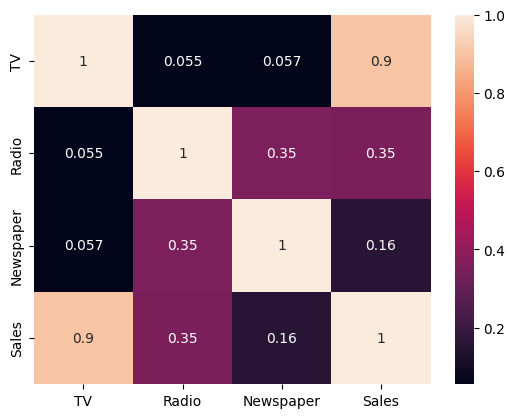

In [13]:
sns.heatmap(advertising.corr(),annot=True)

## Step 2: Performing Simple Linear Regression
Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

In [14]:
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split

###Steps:
- Create X and y
- Create train and test sets (70-30,80-20)
- Train your model on training set (i.e learn the coefficients)
- Evaluate the model (training set,test set)

In [15]:
# create X and y
X= advertising['TV']
y= advertising['Sales']

In [16]:
# train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train.shape


(140,)

In [17]:
X_train.head(10)

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
127     80.2
81     239.8
88      88.3
119     19.4
110    225.8
Name: TV, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [18]:
#training the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [19]:
#fitting the model
lr= sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

So the equation we get is
####Sales= 6.94+0.05.TV

In [20]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 05 May 2023   Prob (F-statistic):           1.52e-52
Time:                        06:00:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- If you can see above the **P value** of both const and TV are 0 which means that they are significant
- **R-squared** 0.816 means 81% of data variance is explained by TV
- **Prob(F-statistic)** lower value shows that high value of R-squared and fit is not  purely by chance
- If Prob(F-statistic) is less than 0.05 you can conclude that the overall model fit is significant.

In [21]:
y_train_pred=lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

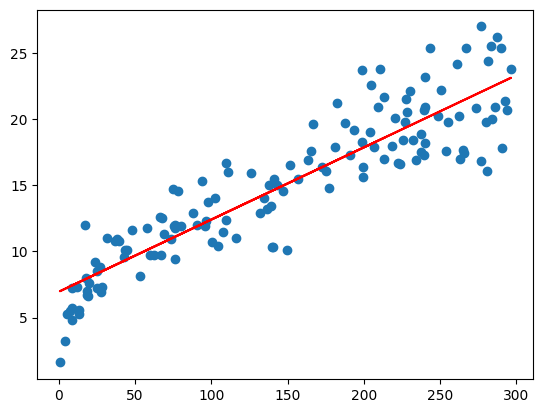

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

### Step 3:Residual Analysis


In [23]:
# error = f(y_train,y_train_pred)

In [24]:
res=y_train-y_train_pred
res.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
dtype: float64

<ipython-input-25-55a9b98bd715>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual Plot')

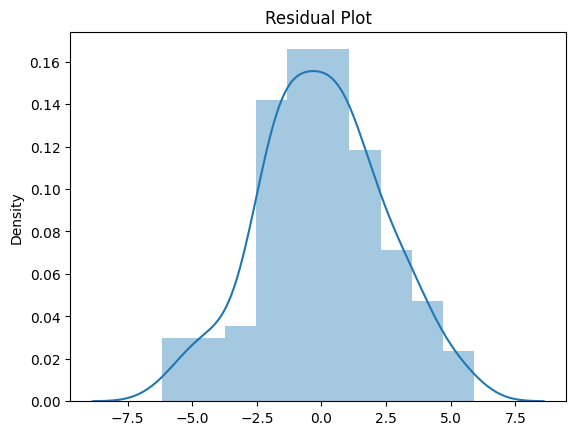

In [25]:
#plot the residuals
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

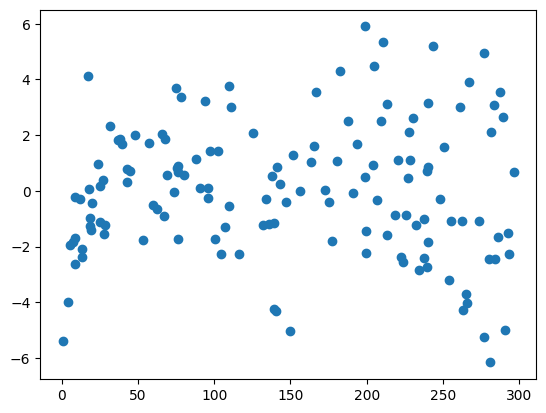

In [26]:
#look for patterns in residuals (we should not be able to identify any pattern)
plt.scatter(X_train,res)
plt.show()


### Step-4 Predictions and Evaluation on the test set

- predictictions on the test set (y_test_pred)
- evaluate the model,r-squared ,on the test


In [29]:
#predictions on the test set
X_test_sm=sm.add_constant(X_test)

#pred on test
y_test_pred=lr_model.predict(X_test_sm)
y_test_pred.head()


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [34]:
#evaluate the model,r-squared ,on the test
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [33]:
#r-squared value of test data
r2= r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.792103160124566

In [32]:
#r-squared value of train data
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_train

0.8157933136480389

In [36]:
#mean squared error

mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826953

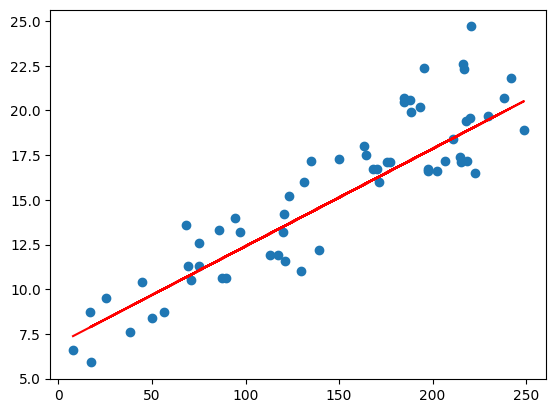

In [38]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

## Linear Regression using sklearn

In [39]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)

In [40]:
# Steps in sklearn model building

from sklearn.linear_model import LinearRegression

#Step-1.create an object of linear regression
lm=LinearRegression()

X_train.shape

(140,)

We need to reshape the X_train from (140,) series to (140,1),
otherwise on fitting the model using sklearn we will get error

In [43]:
#reshape the X_train to (n,1)
# we are saying that ignore the number of row and add one column in the X_train
X_train_lm=X_train.values.reshape(-1,1)
X_train_lm.shape 

(140, 1)

In [44]:
X_test_lm=X_test.values.reshape(-1,1)
X_test_lm.shape

(60, 1)

In [45]:
#Step-2.fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [48]:
#Step-3. see the params,make predictions(train,test)
print(lm.coef_)
print(lm.intercept_)


[0.05454575]
6.948683200001357


In [49]:
# make predictions
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [51]:
# evaluate the model
print(r2_score(y_true=y_train,y_pred=y_train_pred))

print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
